# CG Assignment 1
Divyang Mittal (17CS10012)  
Amatya Sharma (17CS30042)

## Problem Statement : 
- Generate instances of n random points  
- $(n = 10r +3, r > 1)$ on the plane.
- Construct a separating circle that encloses 30% of points in the interior
- Vary r, report your results and show diagrams 
- Submit report via Moodle
- Due: 19 January 2021
- Credit: 5%

## Assumptions :
- Dimensions of the defining plane $N\times N ~=~ 100 \times 100$.
- No two points have same $x$ (or $y$) coordinates.
- No 4 points are concyclic (to be resolved)
- No 3 points are colinear (to be resolved)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [65]:
## -- helper functions
# compute the circle passing the given 3 points.
# if 3 pts are colinear, return radius = infinite (a degenerate circle)

def get_concircle(p1, p2, p3):
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-6:
        return (None, inf)

    # Center of circle
    cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    
    return (cx, cy), radius

# returns randomly sampled int from [0,n-1] excluding pts in exclude[]
def distinct_sample(exclude, n):
    randInt = np.random.randint(0,n-1)
    return distinct_sample(exclude) if randInt in exclude else randInt 
  
def getAngle2(pA, pB, pC):
    CA = pC - pA
    CB = pC - pB
    dot = np.dot(CA,CB)
    det = CA[0]*CB[1]-CB[0]*CA[1]
    ACB = math.atan2(det, dot)

    # Converting to degree
    ACB = ACB * 180 / math.pi;  
    if(ACB<0):
        ACB = 360+ACB
    return ACB
# compute angle /_ABC
def getAngle(A, B, C):  
    # Square of lengths be a2, b2, c2  
    a2 = np.linalg.norm(B - C)  
    b2 = np.linalg.norm(A - C)  
    c2 = np.linalg.norm(A - B)  

    # length of sides be a, b, c  
    a = math.sqrt(a2);  
    b = math.sqrt(b2);  
    c = math.sqrt(c2);  

    # From Cosine law   
    gamma = math.acos((a2 + b2 - c2) / (2 * a * b));  
    
    # Converting to degree
    gamma = gamma * 180 / math.pi;  
    return gamma

# gets a random line from set of points pts[]
def get_LineAB(pts, ax):
    n = pts.shape[0]
    # find 2 random pts to draw a line
    # for simplicity we consider two pts with lowest y coordinates
    yMin_indx = np.argpartition(pts[:,1], 2)
#     print(pts[yMin_indx[:2]])
    pA = pts[yMin_indx[0]]
    pB = pts[yMin_indx[1]]
    # print(pA, pB)

    # plotting the line b/w A and B
    m = (pA[1]-pB[1])/(pA[0]-pB[0])
#     print("m:",math.atan2(m, 1))
    if(math.atan2(m, 1)<0):
        temp = pA
        pA = pB
        pB = temp
    c = -m*(pA[0])+pA[1]
    x = np.linspace(0, 110)
    ax.plot(x, m*x+c)

    # show pts A and B with labels
    ax.scatter([pA[0],pB[0]], [pA[1], pB[1]], c = 'r', marker = '.')
    ax.annotate("A", (pA[0], pA[1]))
    ax.annotate("B", (pB[0], pB[1]))
    
    return pA, pB, ax

# compute the required circle
def get_Circle(pts, pA, pB, ax):
    n = pts.shape[0]
    angles = [] # angles subtended by all pts on line segment AB
    for i in pts: # compute angles
        if (i==pA).all() or (i==pB).all(): # ignore A and B
            continue
        else :
            gm = getAngle2(pA, pB, i)
            
            angles.append((gm, i))
#     print(angles)
    angles.sort(reverse=True)

    pC = angles[int(3*n/10)][1] # obtain the separating point

    ax.scatter(pC[0], pC[1], c = 'y', marker = '.')
    ax.annotate("C", (pC[0], pC[1]))
    cntr, radius =get_concircle(pA, pB, pC) # compute a circle through A, B, C
    crcl = plt.Circle(cntr, radius, color='r', fill = False) # plot the circle
    ax.add_patch(crcl)
    
    return cntr, radius

  
# calculate the fraction of points inside the circle 
def accuracy(cntr, radius, pts):
    n = pts.shape[0]
    inside_Circle = 0 # number of points inside the circle
    on_circle = 0 # number of points inside the circle, we'll ignore these points

    for i in pts:
        if np.linalg.norm(i-cntr) < radius:
            inside_Circle = inside_Circle+1
        if np.linalg.norm(i-cntr) == radius:
            on_circle = on_circle+1


    fraction_inside = inside_Circle/(n-on_circle)
#     error = (fraction_inside-.3)/(.3) *100.0
    print("Percentage of points inside the circle = ", fraction_inside*100.0)
    pass

# computer the required circle,returns 
def main_Algorithm(pts, ax):
    pA, pB, ax = get_LineAB(pts, ax) # get the line b/w 2 random pts
    cntr, radius = get_Circle(pts, pA, pB, ax)
    plt.show()
    
    accuracy(cntr, radius, pts) # lets verify 
    return

## Build Dataset
def generate_data(r):     
    if(r==-1):
        r = int(input("r = "))
    n = 10*r+3
    pts = np.random.sample((n,2))*100 # sample distinct pts
    
    # plot the points
    fig, ax = plt.subplots() 
    fig.set_size_inches(5, 5)
    ax.scatter(pts[:,0],pts[:,1], marker = '.')
    return ax, pts

---------------
 Separating Circle of  23  points:


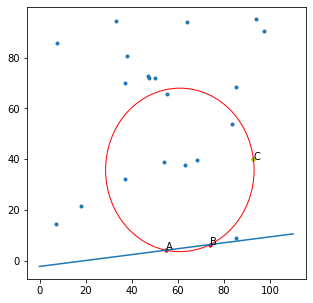

Percentage of points inside the circle =  33.33333333333333
---------------
 Separating Circle of  23  points:


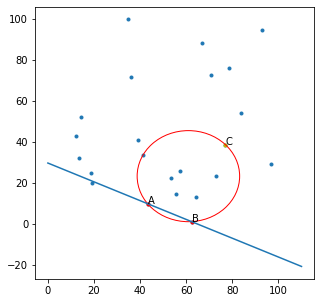

Percentage of points inside the circle =  31.818181818181817
---------------
 Separating Circle of  23  points:


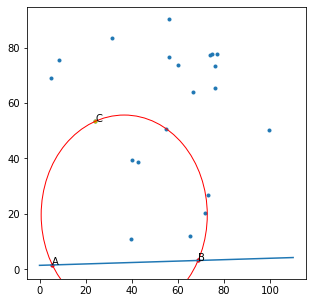

Percentage of points inside the circle =  36.36363636363637
---------------
 Separating Circle of  23  points:


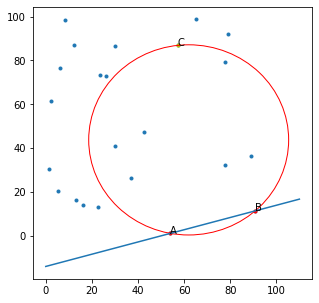

Percentage of points inside the circle =  28.57142857142857
---------------
 Separating Circle of  33  points:


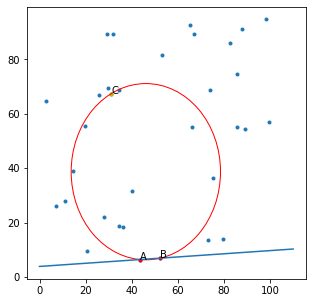

Percentage of points inside the circle =  29.03225806451613
---------------
 Separating Circle of  33  points:


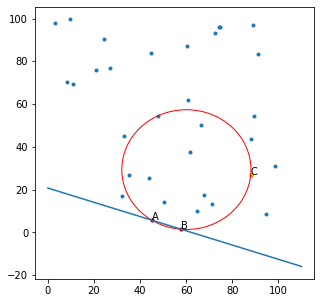

Percentage of points inside the circle =  34.375
---------------
 Separating Circle of  33  points:


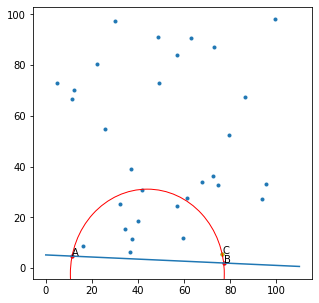

Percentage of points inside the circle =  29.03225806451613
---------------
 Separating Circle of  43  points:


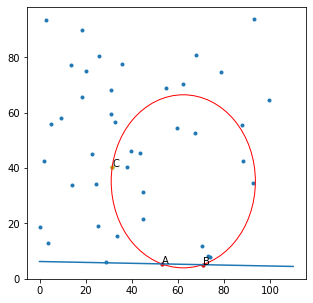

Percentage of points inside the circle =  29.268292682926827
---------------
 Separating Circle of  43  points:


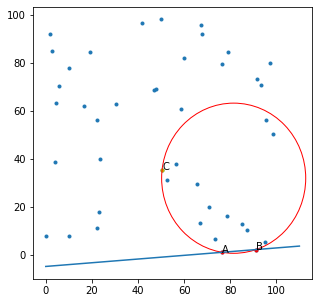

Percentage of points inside the circle =  33.33333333333333
---------------
 Separating Circle of  43  points:


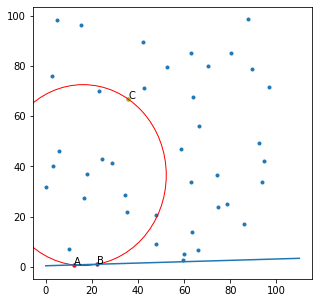

Percentage of points inside the circle =  30.0
---------------
 Separating Circle of  43  points:


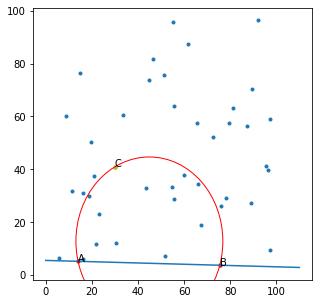

Percentage of points inside the circle =  30.952380952380953
---------------
 Separating Circle of  53  points:


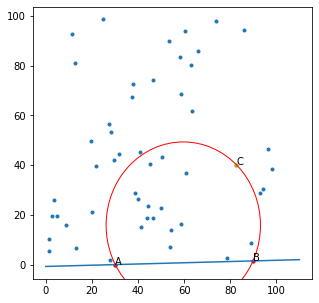

Percentage of points inside the circle =  31.372549019607842
---------------
 Separating Circle of  53  points:


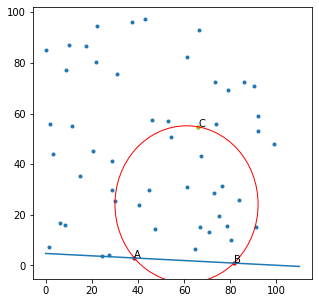

Percentage of points inside the circle =  32.69230769230769
---------------
 Separating Circle of  53  points:


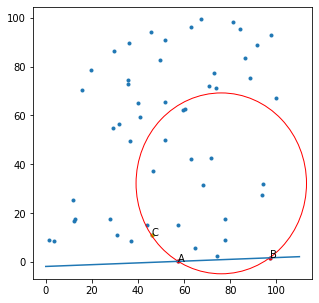

Percentage of points inside the circle =  31.372549019607842
---------------
 Separating Circle of  53  points:


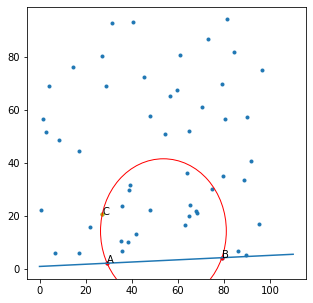

Percentage of points inside the circle =  32.69230769230769
---------------
 Separating Circle of  53  points:


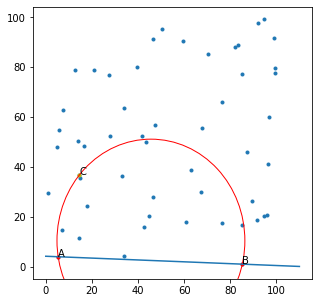

Percentage of points inside the circle =  32.69230769230769
---------------
 Separating Circle of  103  points:


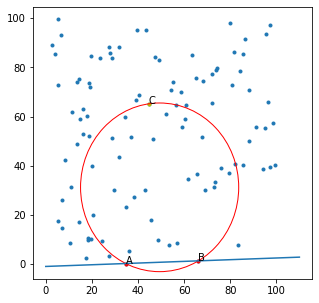

Percentage of points inside the circle =  29.411764705882355
---------------
 Separating Circle of  503  points:


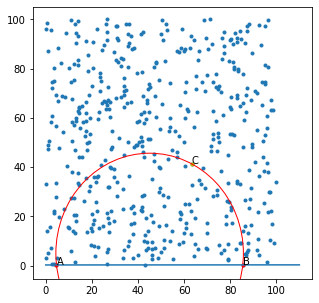

Percentage of points inside the circle =  30.0796812749004
---------------
 Separating Circle of  753  points:


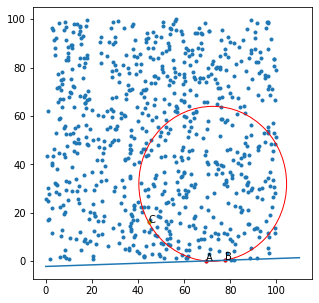

Percentage of points inside the circle =  30.09320905459387
---------------
 Separating Circle of  1003  points:


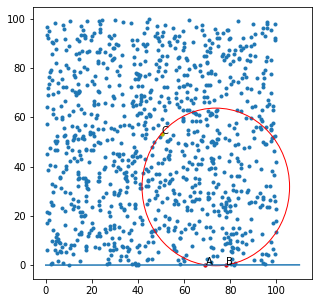

Percentage of points inside the circle =  30.069930069930066


In [69]:
def main(r):
    ax, pts = generate_data(r)
#     print(pts)
    print("---------------\n Separating Circle of ", pts.shape[0], " points:")
#     print(pts.shape[0])
    main_Algorithm(pts,ax)
    pass

main(2)
main(2)
main(2)
main(2)
main(3)
main(3)
main(3)
main(4)
main(4)
main(4)
main(4)
main(5)
main(5)
main(5)
main(5)
main(5)
main(10)
main(50)
main(75)
main(100)
# main(-1)
# main(-1)